# Maximization Using Lagrange Multiplier

## Importing and Helpful Functions

In [1]:
# make sure you've got the following packages installed
import numpy as np

###
# choose for showing figures in external window or inline
###

#%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

In [3]:
# define Lagrange function
def L( x, y, u, lam ):
    return (x-u)**2 + (y+u-2)**2 + lam * (x**2+y**1-1)

def distance( x, y, u, v ):
    return np.sqrt( (x-u)**2 + (y-v)**2  )

## Analyze solution of Lagrange multiplier

### Show distance of $(u,v)$ to $(1/\sqrt{2}, 1/\sqrt{2})$

Distance (x, y) = (0.707, 0.707) to (u, v) = (1.000, 1.000) equals 0.414


(0.0, 5.0)

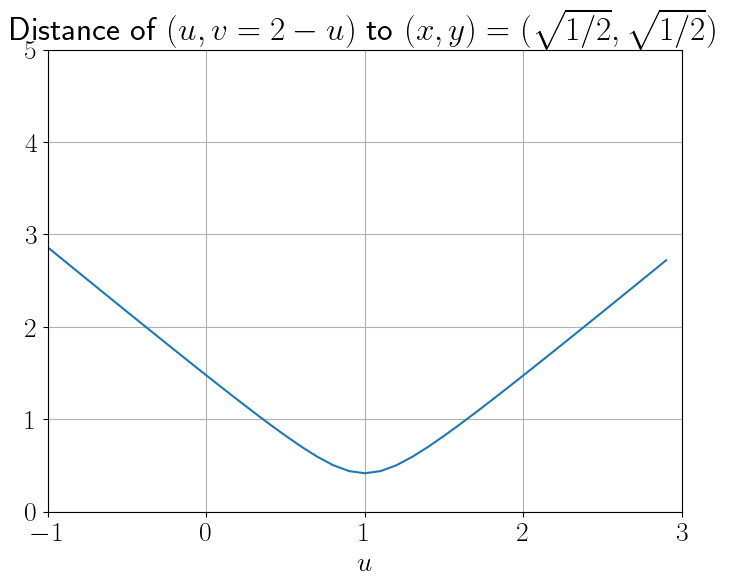

In [4]:
# get analytical solution 1
x = np.sqrt(.5)
y = np.sqrt(.5)
u = 1
v = 2 - u
lam = np.sqrt(2) - 1
dist = distance( x,y,u,v)

print( 'Distance (x, y) = ({:1.3f}, {:1.3f}) to (u, v) = ({:1.3f}, {:1.3f}) equals {:1.3f}'.format( x,y,u,v,dist) )


# now plot distance of points on the line to (x,y)=(1/sqrt(2), 1/sqrt(2)), parametrized by u
u = np.arange(-1, 3, .1 )
v = 2 - u 
dist = distance( x,y,u,v)

plt.subplot(121)
plt.title('Distance of $(u,v=2-u)$ to $(x, y) = (\sqrt{1/2}, \sqrt{1/2})$')
plt.plot(u, dist, label='distance of (u, v) to (x, y) = ({:1.3f}, {:1.3f})'.format( x, y ))
plt.xlabel('$u$')
plt.grid(1)
#plt.legend()
plt.xlim( (-1,3) )
plt.ylim( (0, 5) )


### Show distance of $(x,y)$ to $(1, 1)$

**NOTE:** Since there are two options for y, the one with smaller distance is chosen

Distance (x, y) = (0.707, 0.707) to (u, v) = (1.000, 1.000) equals 0.414


(0.0, 5.0)

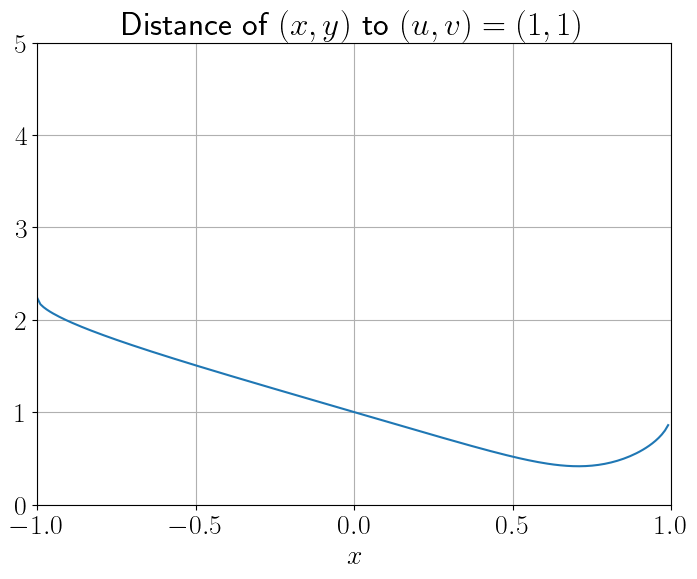

In [5]:
# get analytical solution 1
x = np.sqrt(.5)
y = np.sqrt(.5)
u = 1
v = 2 - u
lam = np.sqrt(2) - 1
dist = distance( x,y,u,v)

print( 'Distance (x, y) = ({:1.3f}, {:1.3f}) to (u, v) = ({:1.3f}, {:1.3f}) equals {:1.3f}'.format( x,y,u,v,dist) )


# now plot distance of points on the line to (x,y)=(1/sqrt(2), 1/sqrt(2)), parametrized by u
u = 1
v = 2 - u
x = np.arange( -1, 1, 0.01 )
dist = np.array( [ distance( a, np.sqrt(1-a**2) ,u,v) if distance( a, np.sqrt(1-a**2) ,u,v) <= distance( a, -np.sqrt(1-a**2) ,u,v) else distance( a, -np.sqrt(1-a**2) ,u,v)  for a in x ] )

plt.subplot(121)
plt.title('Distance of $(x,y)$ to $(u, v)=(1, 1)$')
plt.plot(x, dist )
plt.xlabel('$x$')
plt.grid(1)
#plt.legend()
plt.xlim( (-1,1) )
plt.ylim( (0, 5) )

### Check extended Hessian for verifying Min/Max property

In [6]:
# check extended Hessian for verifying Min/Max property
x = np.sqrt(.5)
y = np.sqrt(.5)
u = 1
v = 2 - u
lam = np.sqrt(2) - 1

# define Hessian (no guarantees here) and check for eigenvalues
H = np.matrix([
    [ 0, 2*x, 2*y, 0 ],
    [ 2*x , 2+2*lam, 0, -2 ],
    [ 2*y , 0, 2+2*lam, 2],
    [ 0, -2, 2, 4 ]
])
print( 'Hessian: \n', H)

D, X = np.linalg.eig( H )
print( '\nEigenvalues are: ', D)
print()
print('Major determinants:')
for _n in range( 2, 5):
    print( 'Determinante of upper-left {}x{} submatrix: {}'.format( _n, _n, np.linalg.det( H[ :_n, :_n ])) )

Hessian: 
 [[ 0.          1.41421356  1.41421356  0.        ]
 [ 1.41421356  2.82842712  0.         -2.        ]
 [ 1.41421356  0.          2.82842712  2.        ]
 [ 0.         -2.          2.          4.        ]]

Eigenvalues are:  [-1.03527618  3.86370331  6.30266397  0.52576316]

Major determinants:
Determinante of upper-left 2x2 submatrix: -2.0
Determinante of upper-left 3x3 submatrix: -11.313708498984765
Determinante of upper-left 4x4 submatrix: -13.254833995939046


### ... a lot more distances

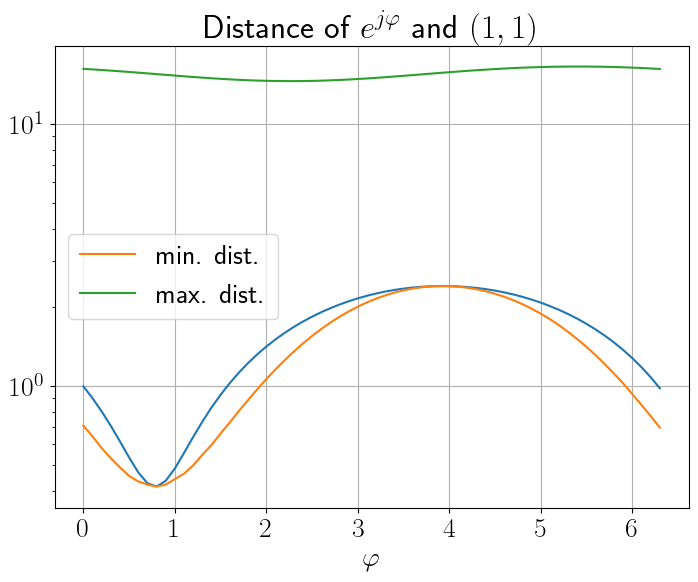

In [7]:
# show values of the distance for several values of x and y, fixing u=1
delta = .1
angles = np.arange( 0, 2*np.pi + delta, delta )

x = np.cos( angles )
y = np.sin( angles )

u = 1
v = 2 - u 

distance_field = np.zeros_like( angles )

for a_ind, a_val in enumerate( angles):
    distance_field[ a_ind ] = distance( np.cos( a_val ), np.sin( a_val ), u, v )



u_array = np.arange( -10, 10, delta )
v_array = 2 - u_array
u_v_points = np.array( list( zip( u_array, v_array ) ) )

min_distance = np.zeros_like( angles )
max_distance = np.zeros_like( angles )

for a_ind, a_val in enumerate( angles):
    min_distance[ a_ind ] = np.min( [ distance( np.cos( a_val ), np.sin( a_val ), line_point[0], line_point[1] ) 
                                     for line_point in u_v_points  ] )

    max_distance[ a_ind ] = np.max( [ distance( np.cos( a_val ), np.sin( a_val ), line_point[0], line_point[1] ) 
                                     for line_point in u_v_points  ] )


plt.subplot(121)   
plt.semilogy( angles, distance_field )
plt.semilogy( angles, min_distance, label='min. dist.' )
plt.semilogy( angles, max_distance, label='max. dist.' )
plt.title( 'Distance of $e^{j\\varphi}$ and $(1,1)$')
plt.xlabel('$\\varphi$')
plt.legend()
plt.grid(1)



### Analyze second solution of Lagrange multiplier

Distance (x, y) = (-0.707, -0.707) to (u, v) = (1.000, 1.000) equals 2.414


(0.0, 5.0)

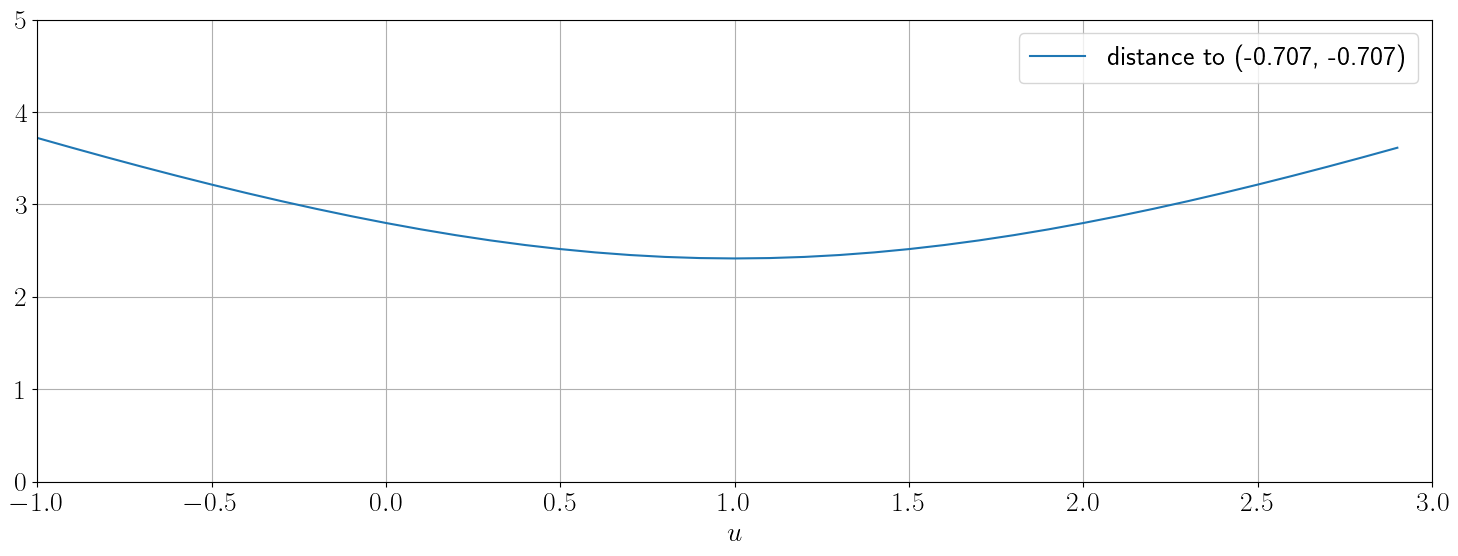

In [8]:
# get analytical solution 2
x = -np.sqrt(.5)
y = -np.sqrt(.5)
u = 1
v = 2 - u
lam = - np.sqrt(2) - 1
dist = distance( x,y,u,v)

print( 'Distance (x, y) = ({:1.3f}, {:1.3f}) to (u, v) = ({:1.3f}, {:1.3f}) equals {:1.3f}'.format( x,y,u,v,dist) )

# now plot distance of points to points on the line, parametrized by u
u = np.arange(-1, 3, .1 )
v = 2 - u 
dist = distance( x,y,u,v)

plt.plot(u, dist, label='distance to ({:1.3f}, {:1.3f})'.format( x, y ))
plt.xlabel('$u$')
plt.grid(1)
plt.legend()
plt.xlim( (-1,3) )
plt.ylim( (0, 5) )

### Check extended Hessian for verifying Min/Max property

In [9]:
x = -np.sqrt(.5)
y = -np.sqrt(.5)
u = 1
v = 2 - u
lam = - np.sqrt(2) - 1

# define Hessian (no guarantees here) and check for eigenvalues
H = np.matrix([
    [ 0, 2*x, 2*y, 0 ],
    [ 2*x, 2+2*lam, 0, -2],
    [ 2*y, 0, 2+2*lam, 2],
    [ 0, -2, 2, 4 ]
])
print( 'Hessian: \n', H)


D, X = np.linalg.eig( H )
print( '\nEigenvalues are: ', D)
print()
print('Major determinants:')
for _n in range( 2, 5):
    print( 'Determinante of upper-left {}x{} submatrix: {}'.format( _n, _n, np.linalg.det( H[ :_n, :_n ])) )

Hessian: 
 [[ 0.         -1.41421356 -1.41421356  0.        ]
 [-1.41421356 -2.82842712  0.         -2.        ]
 [-1.41421356  0.         -2.82842712  2.        ]
 [ 0.         -2.          2.          4.        ]]

Eigenvalues are:  [ 1.03527618 -3.86370331 -3.84781867  5.01939155]

Major determinants:
Determinante of upper-left 2x2 submatrix: -2.0
Determinante of upper-left 3x3 submatrix: 11.313708498984765
Determinante of upper-left 4x4 submatrix: 77.25483399593908


# ... finally: some 2-D plots with axes x, u

**Note:** 
+ v = 2-u is determined
+ for y the smaller value that is satisfying the constraint is chosen

### first: minimum distance as colorplot

In [10]:
x_array = np.arange( -1, 1, 0.01 )
u_array = np.arange(-3, 3, 0.01 )
v_array = 2 - u_array

# Init minimum distance
dist = np.zeros( (len(x_array), len(u_array)) )

for ind_x, x in enumerate( x_array ):
  for ind_u, u in enumerate( u_array ):
    dist[ ind_x, ind_u ] = np.sqrt( np.min( ( distance( x, np.sqrt( 1-x**2 ) , u, 2 - u ),  distance( x, -np.sqrt( 1-x**2 ) , u, 2 - u ) ) ) )

U, X = np.meshgrid( u_array, x_array )

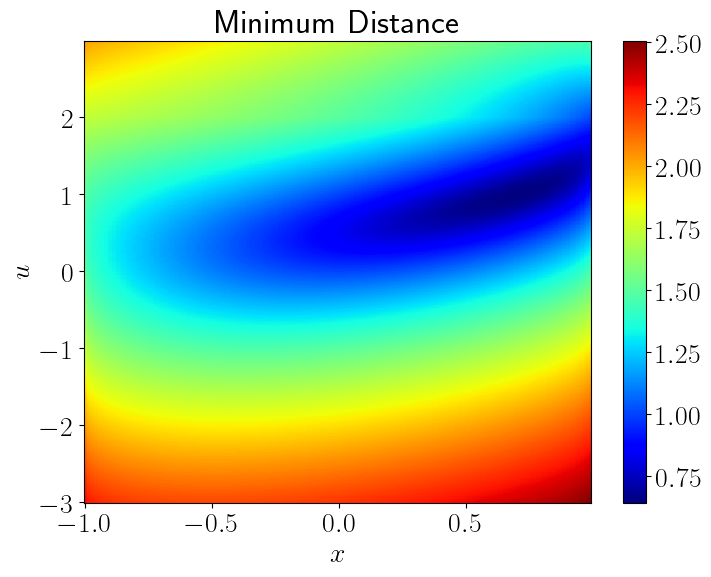

In [11]:
Fig = plt.figure()
plt.subplot(121)
ax = Fig.gca()
color_H = ax.pcolormesh( X, U, dist, cmap='jet')    
plt.xlabel('$x$')
plt.ylabel('$u$')   
plt.title('Minimum Distance')
Fig.colorbar(color_H, orientation='vertical')

### now show if $y=\sqrt{1-x^2}$ or $y=-\sqrt{1-x^2}$ is better

In [12]:
x_array = np.arange( -1, 1, 0.01 )
u_array = np.arange(-3, 3, 0.01 )
v_array = 2 - u_array

# Init minimum distance
dist_plus = np.zeros( (len(x_array), len(u_array)) )
dist_minus = np.zeros( (len(x_array), len(u_array)) )

for ind_x, x in enumerate( x_array ):
  for ind_u, u in enumerate( u_array ):
    dist_plus[ ind_x, ind_u ] = np.sqrt( distance( x, np.sqrt( 1-x**2 ) , u, 2 - u ) )
    dist_minus[ ind_x, ind_u ] = np.sqrt( distance( x, -np.sqrt( 1-x**2 ) , u, 2 - u ) )

U, X = np.meshgrid( u_array, x_array )

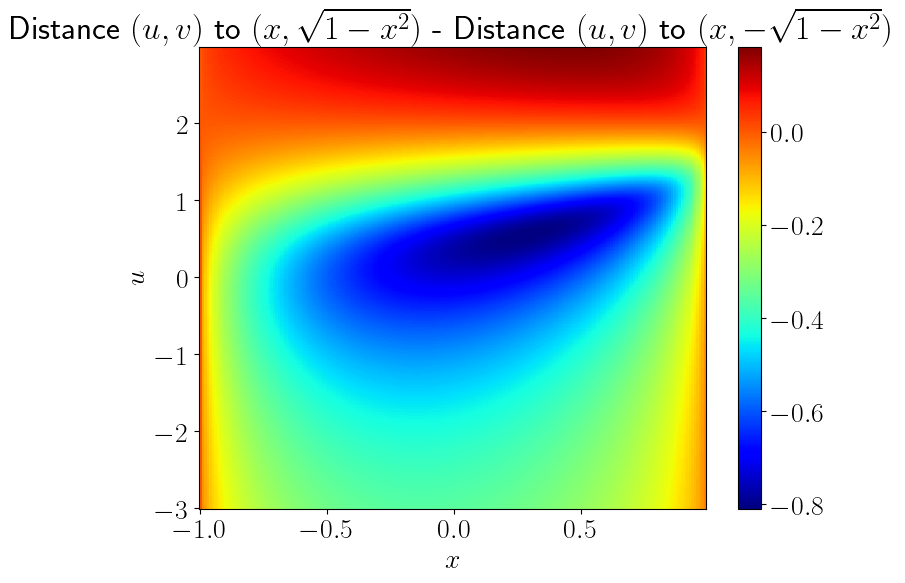

In [16]:
Fig = plt.figure()
plt.subplot(121)
ax = Fig.gca()
color_H = ax.pcolormesh( X, U, dist_plus - dist_minus, cmap='jet')    
plt.xlabel('$x$')
plt.ylabel('$u$')   
plt.title('Distance $(u,v)$ to $(x, \sqrt{1-x^2})$ - Distance $(u, v)$ to $(x, -\sqrt{1-x^2})$ ')
Fig.colorbar(color_H, orientation='vertical')